# CAPE 로버트 쉴러 지수

[로버트 쉴러 지수](https://www.multpl.com)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
cape_dict = {"snp500_cape":"https://www.multpl.com/shiller-pe/table/by-month",
            "10_treasury":"https://www.multpl.com/10-year-treasury-rate/table/by-month",
             "10_treasury_real":"https://www.multpl.com/10-year-real-interest-rate/table/by-month",
            "snp_dividend":"https://www.multpl.com/s-p-500-dividend-yield/table/by-month",
            "snp500_earnings":"https://www.multpl.com/s-p-500-earnings/table/by-month",
            "snp500_price":"https://www.multpl.com/s-p-500-historical-prices/table/by-month",
            "cpi":"https://www.multpl.com/cpi/table/by-month",
            "gdp_growth_rate":"https://www.multpl.com/us-real-gdp-growth-rate/table/by-quarter"}

In [207]:
def read_spr(url:str):
    df=pd.read_html(url)[0]
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date").sort_index()
    return df

### Shiller PE Ratio by Month

In [193]:
url = cape_dict.get("snp500_cape")

In [194]:
df=read_spr(url)

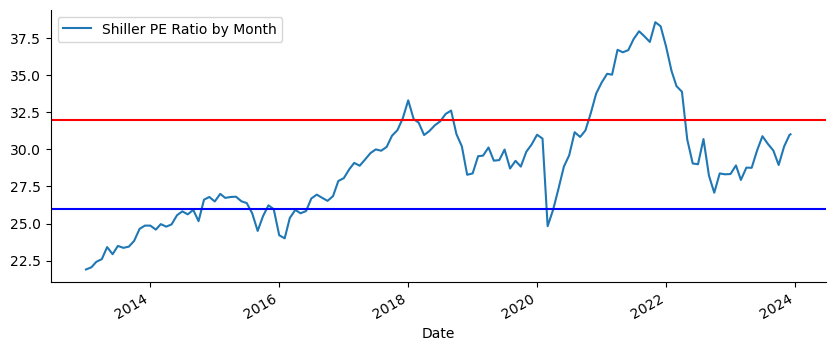

In [195]:
df["2013":].plot(figsize=(10,4))
plt.legend(["Shiller PE Ratio by Month"])
plt.axhline(y=32, color='r', linestyle='-')
plt.axhline(y=26, color='b', linestyle='-')
sns.despine()

### 10 t-note

In [213]:
url1 = cape_dict.get("10_treasury")
url2 = cape_dict.get("10_treasury_real")

In [226]:
df1 = read_spr(url)
df2 = read_spr(url2)
df =pd.merge(left=df1, right=df2, left_index=True, right_index=True)
df = df.map(lambda x:x.replace("%","")).astype("float")
df.columns = ["10_treasury","10_treasury_real"]

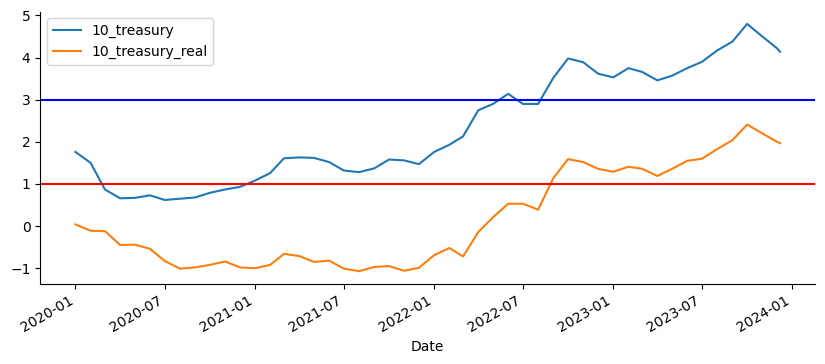

In [231]:
df["2020":].plot(figsize=(10,4))
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=3, color='b', linestyle='-')
sns.despine()

In [179]:
url = cape_dict.get("snp_dividend_yield")

In [180]:
df = read_spr(url)
df = df.map(lambda x:x.split()[-1].replace("%","")).astype("float")

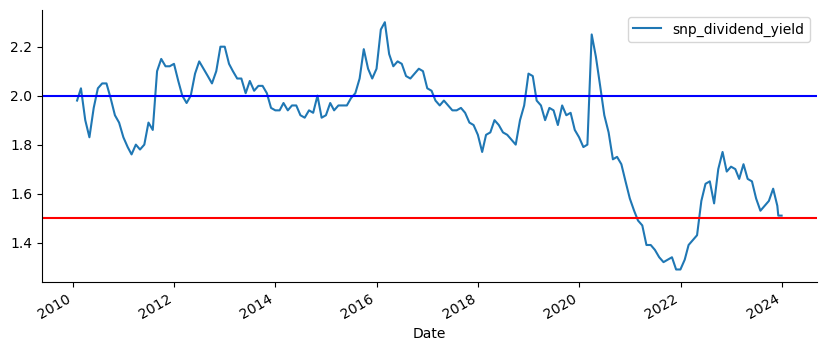

In [186]:
df["2010":].plot(figsize=(10,4))
plt.axhline(y=2, color='b', linestyle='-')
plt.axhline(y=1.5, color='r', linestyle='-')
plt.legend(["snp_dividend_yield"])
sns.despine()

### CPI

In [266]:
url = cape_dict.get("cpi")

In [267]:
df = read_spr(url)
df.columns =["cpi"]

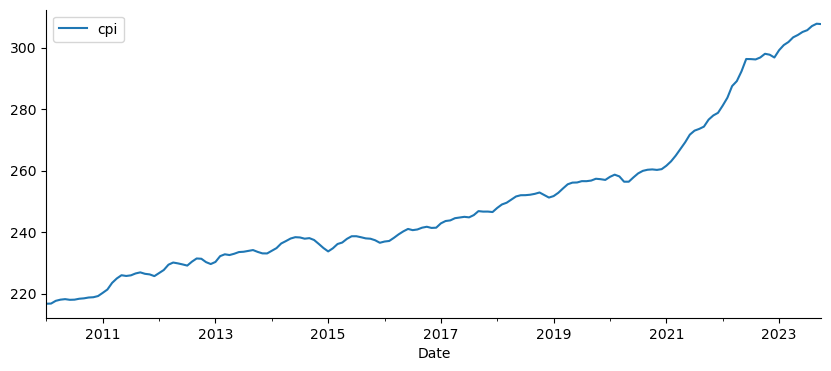

In [268]:
df["2010":].plot(figsize=(10,4))
sns.despine()

### CPI YoY

In [275]:
df = read_spr(url)
df =df.pct_change(12).dropna()*100

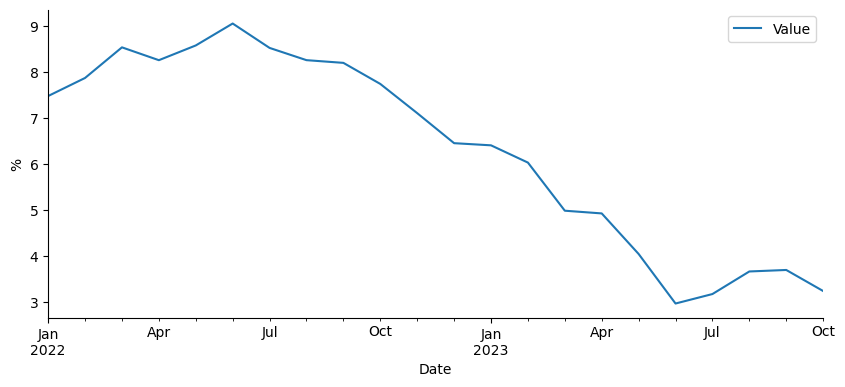

In [276]:
df["2022":].plot(figsize=(10,4))
plt.ylabel("%")
sns.despine()

### gdp_growth_rate

In [308]:
url = cape_dict.get("gdp_growth_rate")

In [312]:
df = read_spr(url)
df.columns =["gdp_growth_rate"]
df = df.map(lambda x:x.replace("%","")).astype("float")

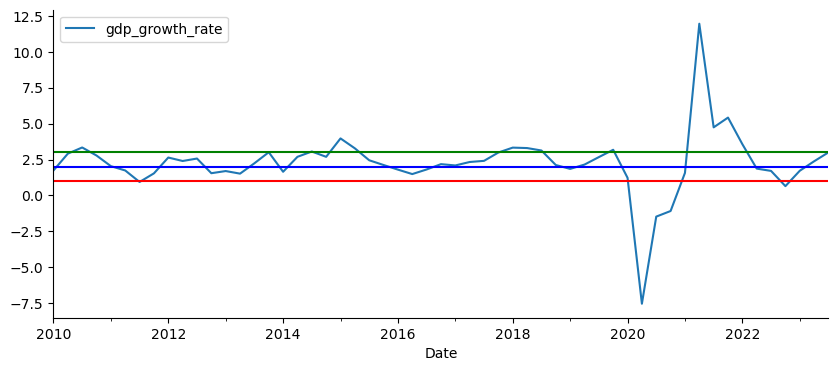

In [316]:
df["2010":].plot(figsize=(10,4))
plt.axhline(y=3, color='g', linestyle='-')
plt.axhline(y=2, color='b', linestyle='-')
plt.axhline(y=1, color='r', linestyle='-')
sns.despine()

---